<a href="https://colab.research.google.com/github/SamTremblay18/Hockey-Shot-Classification/blob/main/CNN_Method5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Method 5 -  Reframe to 576 frames and HSC (Hands sensor configuration)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from google.colab import drive 
drive.mount('/content/drive')
import pickle
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers 
from keras import models
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, GlobalAveragePooling1D

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Mounted at /content/drive


In [2]:
def open_pickle(path_pickle):
  f = open(path_pickle, 'rb')
  P = pickle.load(f)
  f.close()

  return P

In [3]:
X_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_test5.pickle')
X_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/X_train5.pickle')
y_test = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_test5.pickle')
y_train = open_pickle('/content/drive/MyDrive/Sam/File_saved/y_train5.pickle')

# 1 - CNN model from scratch by hfawaz https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

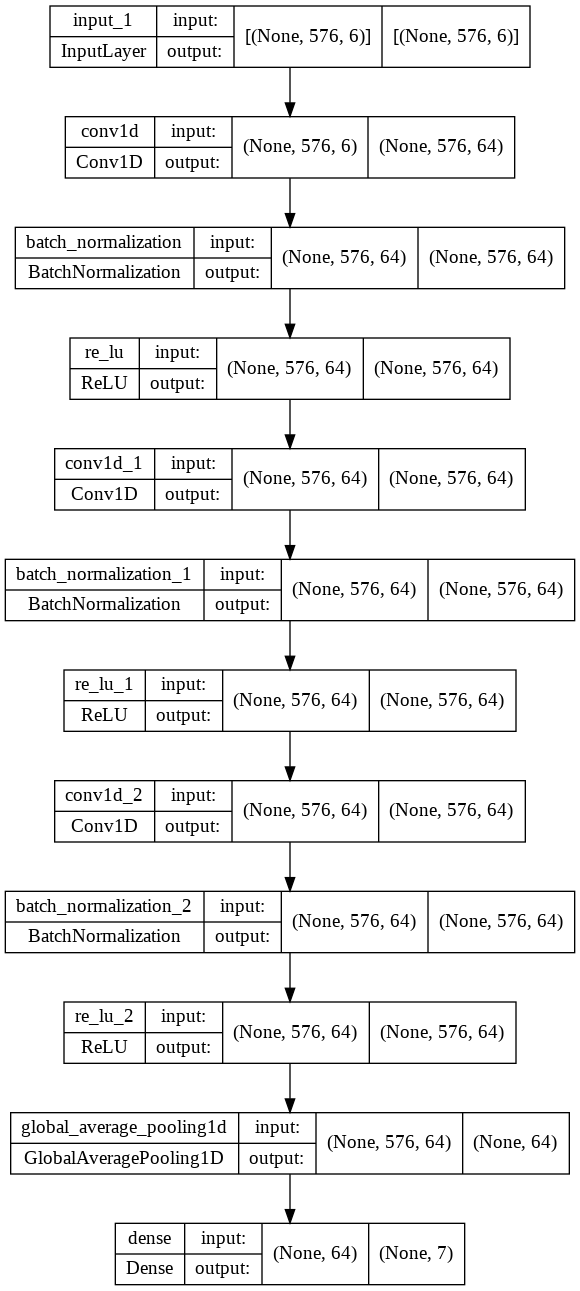

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 10s 11ms/step - loss: 1.2308 - sparse_categorical_accuracy: 0.5853 - val_loss: 1.3184 - val_sparse_categorical_accuracy: 0.5777 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 0s 7ms/step - loss: 0.8435 - sparse_categorical_accuracy: 0.7886 - val_loss: 0.9909 - val_sparse_categorical_accuracy: 0.6875 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 0s 7ms/step - loss: 0.6774 - sparse_categorical_accuracy: 0.8284 - val_loss: 0.7793 - val_sparse_categorical_accuracy: 0.7879 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 0s 7ms/step - loss: 0.5795 - sparse_categorical_accuracy: 0.8455 - val_loss: 0.6251 - val_sparse_categorical_accuracy: 0.8314 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 0s 7ms/step - loss: 0.4877 - sparse_categorical_accuracy: 0.8716 - val_loss: 0.4972 - val_sparse_categorical_accuracy: 0.8788 - lr: 0.0010
Epoch 6/500
66/66 [===================

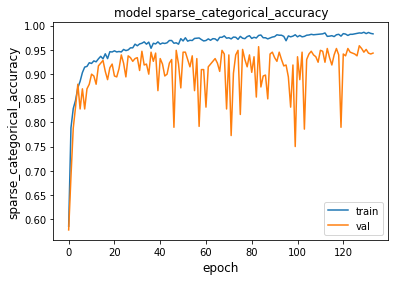

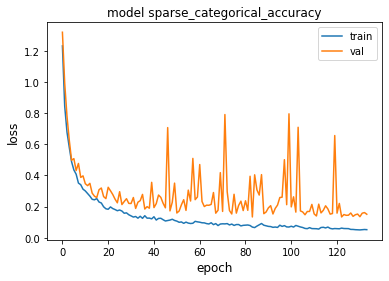

In [ ]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#2 - Hfawaz CNN 3 layers, 3 filters=128,  3 dropout, l1_l2 

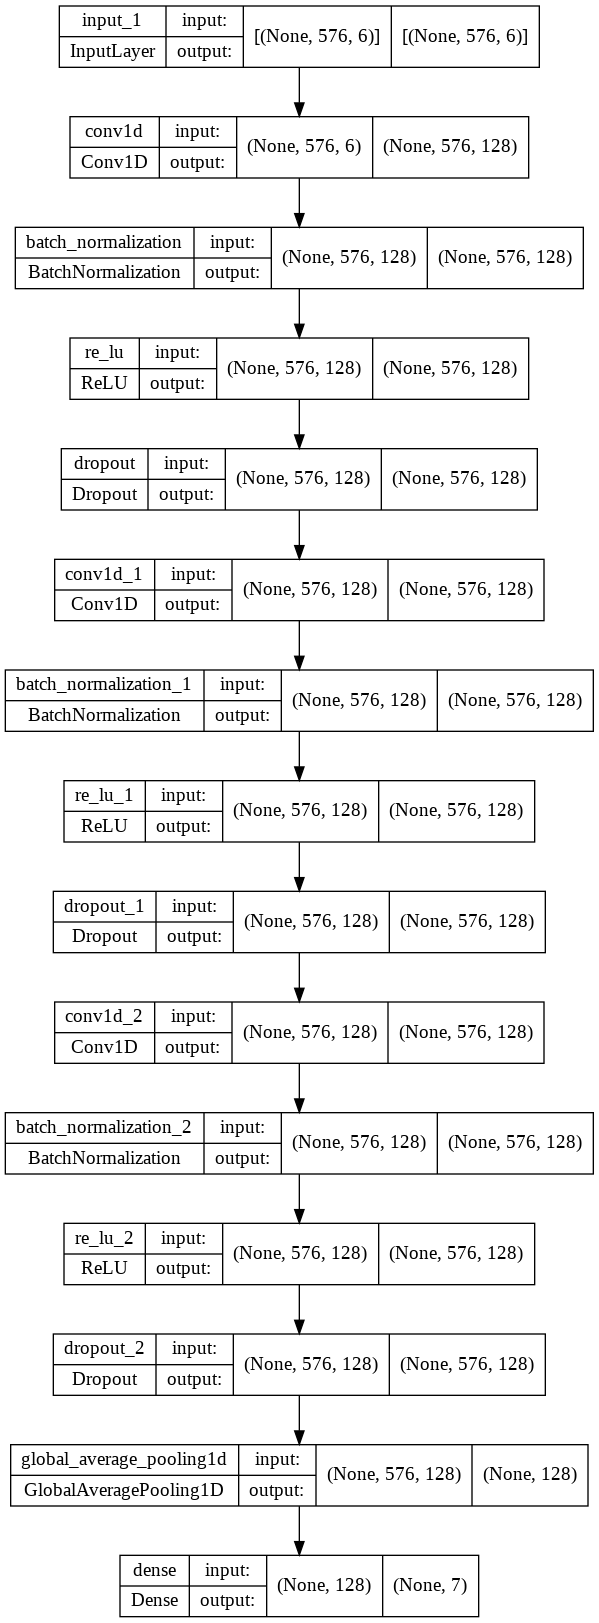

In [4]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    conv1 = keras.layers.Dropout(0.5)(conv1)

    conv2 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    conv2 = keras.layers.Dropout(0.5)(conv2)

    conv3 = keras.layers.Conv1D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    conv3 = keras.layers.Dropout(0.5)(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(7, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [5]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "model2.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
66/66 [==============================] - 13s 24ms/step - loss: 4.2813 - sparse_categorical_accuracy: 0.5782 - val_loss: 3.5846 - val_sparse_categorical_accuracy: 0.1875 - lr: 0.0010
Epoch 2/500
66/66 [==============================] - 1s 16ms/step - loss: 1.6184 - sparse_categorical_accuracy: 0.8090 - val_loss: 2.5232 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 3/500
66/66 [==============================] - 1s 15ms/step - loss: 1.0000 - sparse_categorical_accuracy: 0.8209 - val_loss: 2.5960 - val_sparse_categorical_accuracy: 0.1989 - lr: 0.0010
Epoch 4/500
66/66 [==============================] - 1s 16ms/step - loss: 0.8625 - sparse_categorical_accuracy: 0.8417 - val_loss: 2.1970 - val_sparse_categorical_accuracy: 0.2670 - lr: 0.0010
Epoch 5/500
66/66 [==============================] - 1s 16ms/step - loss: 0.8009 - sparse_categorical_accuracy: 0.8431 - val_loss: 2.0324 - val_sparse_categorical_accuracy: 0.2841 - lr: 0.0010
Epoch 6/500
66/66 [===============

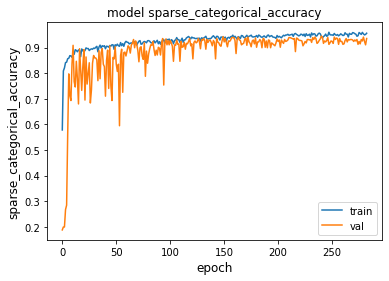

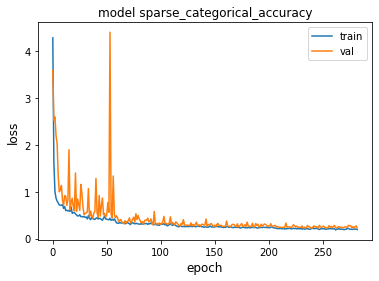

In [6]:
metric = "sparse_categorical_accuracy"

plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("model " + metric)
plt.ylabel('loss', fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# Cross-validation from https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

In [ ]:
from sklearn.model_selection import KFold
num_folds = 10

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
input_shape=inputs.shape[1:]
fold_no = 1
for train, test in kfold.split(inputs, targets):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  output_layer = keras.layers.Dense(7, activation="softmax")(gap)

  epochs = 500
  batch_size = 32
  callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
  ]
  model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
  )

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(
    inputs[train],
    targets[train],
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
  )


  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/500
75/75 [==============================] - 2s 9ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0493 - val_sparse_categorical_accuracy: 0.9883 - lr: 0.0010
Epoch 2/500
75/75 [==============================] - 0s 5ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9761 - val_loss: 0.1031 - val_sparse_categorical_accuracy: 0.9666 - lr: 0.0010
Epoch 3/500
75/75 [==============================] - 0s 5ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.0568 - val_sparse_categorical_accuracy: 0.9833 - lr: 0.0010
Epoch 4/500
75/75 [==============================] - 0s 5ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.0797 - val_sparse_categorical_accuracy: 0.9749 - lr: 0.0010
Epoch 5/500
75/75 [==============================] - 0s 5ms/step - loss: 0.0571 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.108